In [75]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path.cwd().parent   # one level up from notebook folder
DATA_DIR = PROJECT_ROOT / "data" / "raw" / "ncvs"

rape_fp = DATA_DIR / "Rate of rape_sexual assault victimizations by sex, 1993 to 2023.csv"
violent_fp = DATA_DIR / "Rate of violent victimizations by sex, 1993 to 2023.csv"

print("Rape file path exists?", rape_fp.exists())
print("Violent file path exists?", violent_fp.exists())

rape_df = pd.read_csv(rape_fp)
violent_df = pd.read_csv(violent_fp)

print("Rape/Sexual Assault:")
print(rape_df.head())

print("\nViolent Victimizations:")
print(violent_df.head())

Rape file path exists? True
Violent file path exists? True
Rape/Sexual Assault:
                                                                                                                                                                                             Rate of rape/sexual assault victimizations by sex, 1993 to 2023
Year Sex  Crime Type          Number Number CI Lower Bound Number CI Upper Bound Number SE Number Flag Rate per 1000 persons age 12 or older Rate CI Lower Bound Rate CI Upper Bound Rate SE                                          Rate Flag             
1993 Male Rape/sexual assault 63,526 24,068                102,984               20,132    0           0.6                                   0.24                1.01                0.20                                                     0             
1994 Male Rape/sexual assault 56,463 25,301                87,625                15,899    0           0.5                                   0.25                

In [76]:
df_cleaned.groupby("age_group")["Rate"].mean().sort_values(ascending=False)

age_group
All Ages    19.80
21 to 24    18.35
18 to 20    15.65
Name: Rate, dtype: float64

In [77]:
df_cleaned.groupby("Victim sex")["Rate"].mean()

Victim sex
Female    17.62
Male      19.50
Name: Rate, dtype: float64

Text(0.5, 0.98, 'Victimization Rates by Crime Type and Sex (2023)')

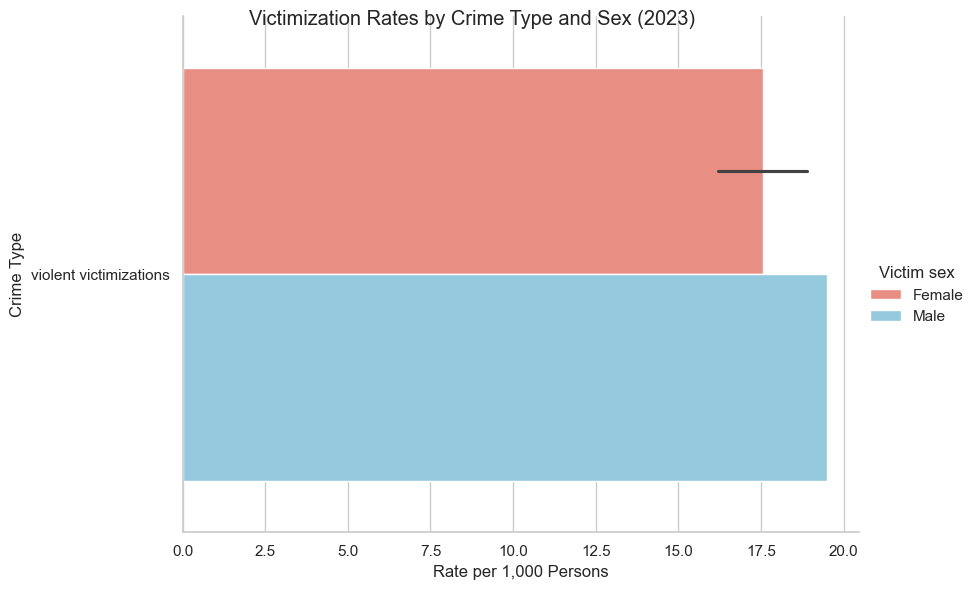

In [78]:
g = sns.catplot(
    data=df_year, kind="bar",
    x="Rate", y="crime_type", hue="Victim sex",
    palette={'Male':'skyblue', 'Female':'salmon'},
    height=6, aspect=1.5
)
g.set_axis_labels("Rate per 1,000 Persons", "Crime Type")
g.fig.suptitle(f"Victimization Rates by Crime Type and Sex ({latest_year})")

In [79]:
print(rape_df.columns)

Index(['Rate of rape/sexual assault victimizations by sex, 1993 to 2023'], dtype='object')


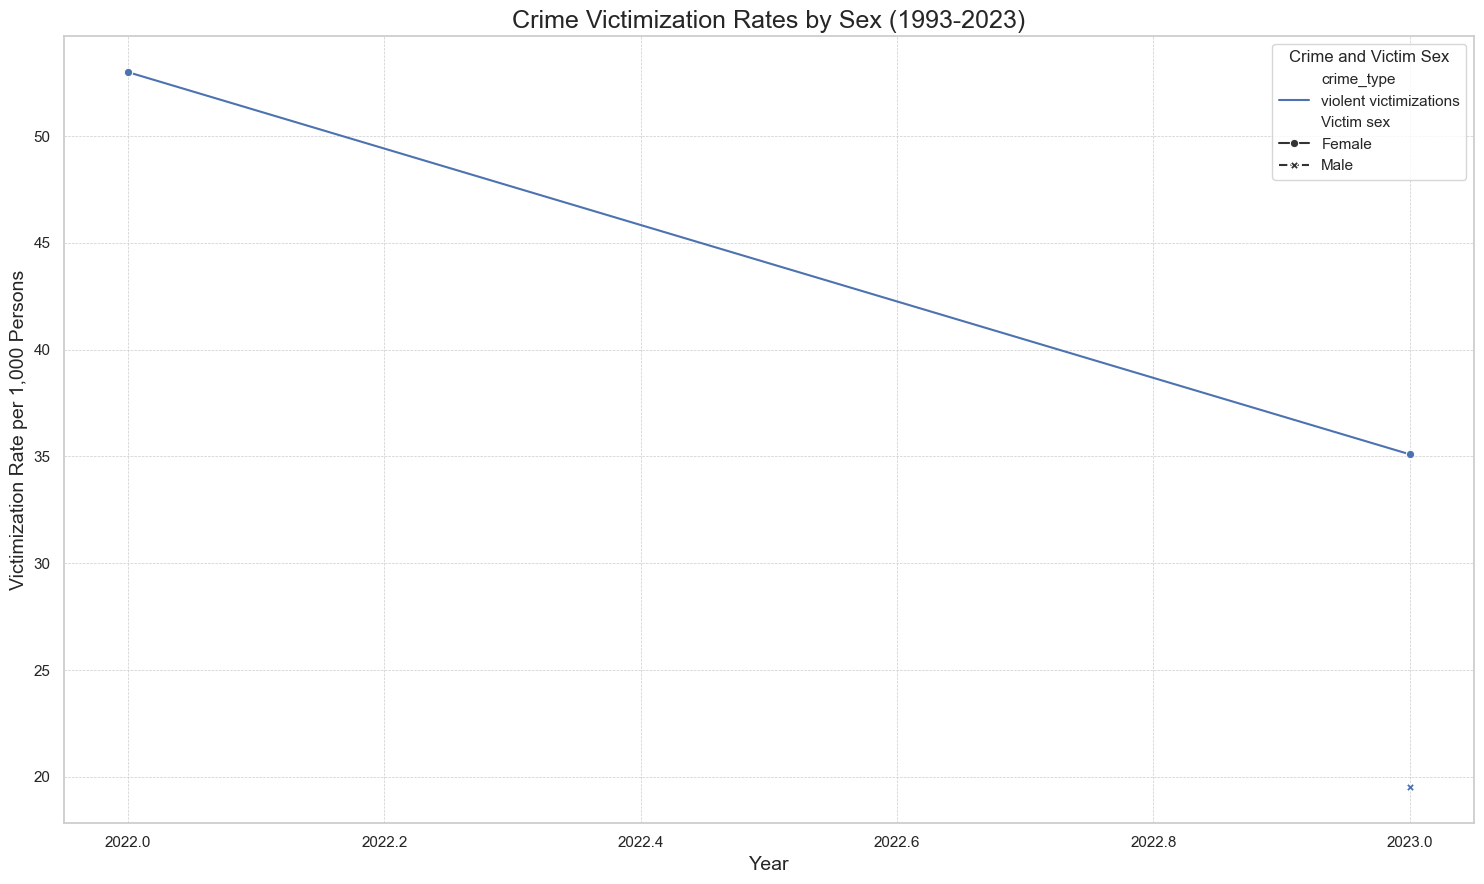

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

crimes_to_plot = [
    'rape_sexual assault victimizations',
    'violent victimizations'
]

df_filtered = df_cleaned[
    (df_cleaned['crime_type'].isin(crimes_to_plot)) &
    (df_cleaned['Victim sex'].isin(['Male', 'Female'])) &
    (df_cleaned['Year'] >= 1993) & (df_cleaned['Year'] <= 2023)
]

summary_plot = df_filtered.groupby(['Year', 'crime_type', 'Victim sex'])['Rate'].sum().reset_index()

plt.figure(figsize=(15, 9))

sns.lineplot(
    data=summary_plot,
    x='Year',
    y='Rate',
    hue='crime_type',
    style='Victim sex',
    markers=True,
    dashes=True
)

plt.title('Crime Victimization Rates by Sex (1993-2023)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Victimization Rate per 1,000 Persons', fontsize=14)
plt.legend(title='Crime and Victim Sex')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()